# Classification Template
Supervised learning classification technique. It is used to predict a qualitative outcome.  
(i.e. *yes* or *no*, *convert* or *not convert*, *positive* or *negative*, in this case  `good` or `bad` etc.)

## Import Libraries and Data
-  Import Libraries  
-  Import dataset(s)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from pycaret.classification import *

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
# Import the dataset
data = pd.read_csv('./data/GermanCredit.csv')
data.head()

,checking_acc,duration_mnth,credit_hist,purpose,credit_amt,savings_acc,emp_status,installment_rate,pstatus_sex,guarantor,Residence_LOS,property,age,installment_plan,housing,existing_credit,job,dependents,telephone,foreign_worker,credit
0,Less than 0 DM,6,Critical account,radio/television,1169,none,Greater than 7 years,4,male_single,none,4,real estate,67,none,own,2,skilled employee,1,registered,yes,bad
1,Btw 0 to 199 DM,48,Existing credits paid back duly,radio/television,5951,Less than 100 DM,Btw 1 to 4 years,2,female_divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,none,yes,good
2,none,12,Critical account,education,2096,Less than 100 DM,Btw 4 to 7 years,2,male_single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,bad
3,Less than 0 DM,42,Existing credits paid back duly,furniture/equipment,7882,Less than 100 DM,Btw 4 to 7 years,2,male_single,guarantor,4,BSSA or life insurance,45,none,free,1,skilled employee,2,none,yes,bad
4,Less than 0 DM,24,Delays in paying off,new car,4870,Less than 100 DM,Btw 1 to 4 years,3,male_single,none,4,none,53,none,free,2,skilled employee,2,none,yes,good


## Exploratory Data Analysis (EDA)
-  dataframe shape  
-  identify null / na values  
-  Tukey Five Number - describe() 
-  Seaborn Visualization

In [3]:
# Data shape
print(f'The data has {data.shape[0]} records and {data.shape[1]} columns')

The data has 1000 records and 21 columns


In [4]:
# Nulls in the data
msk = data.isna().sum()
msk[msk > 0] # or
#msk

Series([], dtype: int64)

In [5]:
# Information about numeric features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_mnth,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amt,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Residence_LOS,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credit,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [6]:
# inforamtion about the category data
data.describe(include='object').T

,count,unique,top,freq
checking_acc,1000,4,none,394
credit_hist,1000,5,Existing credits paid back duly,530
purpose,1000,10,radio/television,280
savings_acc,1000,5,Less than 100 DM,603
emp_status,1000,5,Btw 1 to 4 years,339
pstatus_sex,1000,4,male_single,548
guarantor,1000,3,none,907
property,1000,4,car or other,332
installment_plan,1000,3,none,814
housing,1000,3,own,713


### Data visualization with Seaborn

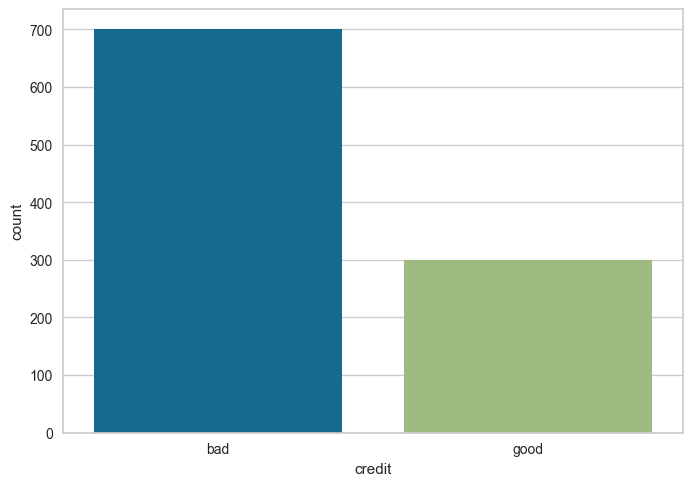

In [7]:
sns.countplot(x= data['credit']);

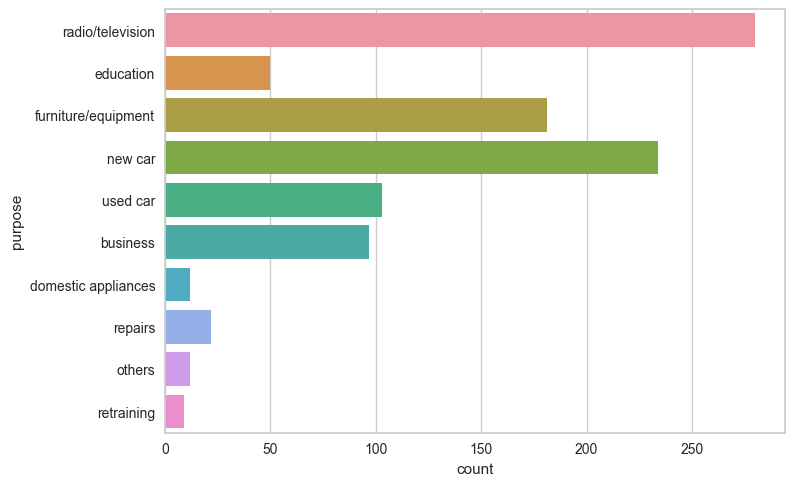

In [8]:
sns.countplot(y= data['purpose']);

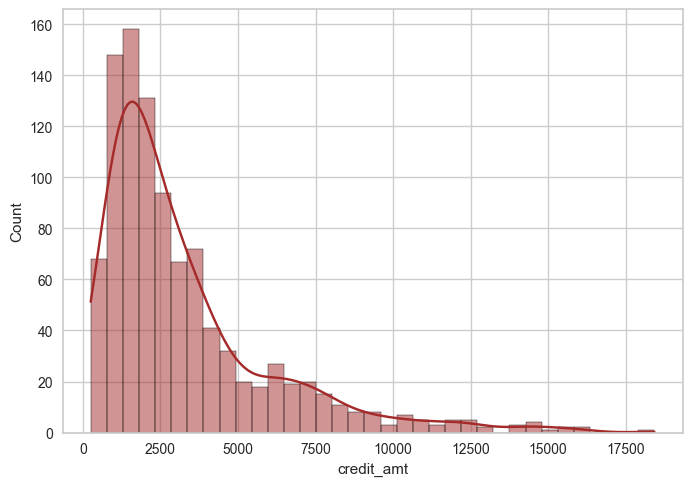

In [9]:
sns.histplot(x= data['credit_amt'], kde=True, color='brown');

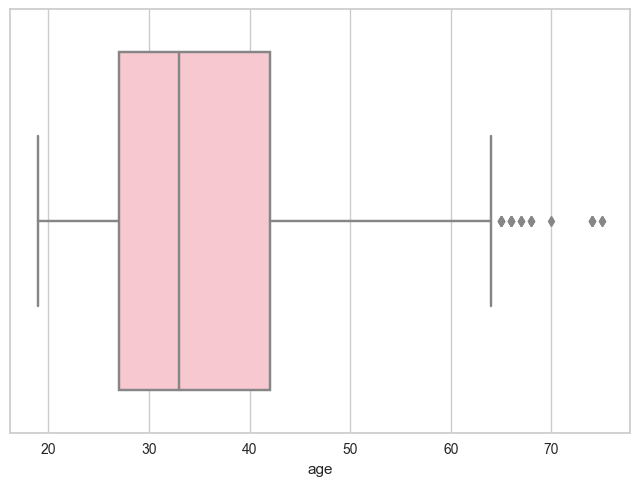

In [10]:
sns.boxplot(x=data['age'], color='pink');

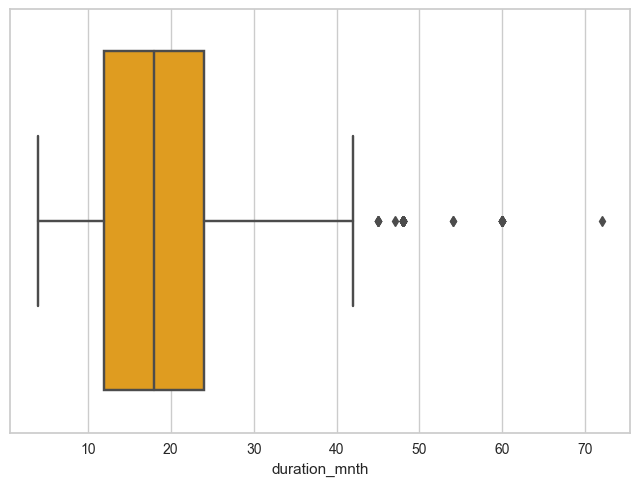

In [11]:
sns.boxplot(x=data['duration_mnth'], color='orange');

## Model Building
- Create unseen data
- Set up data 
- Create model
- tune model (if required)
- Finalize model
- plot model
- Prediction

In [12]:
# Holding out Data as unseen from the model
unseen = data.sample(n= 100)
data = data[~data.index.isin(unseen.index)]
print(f'Data for model: {data.shape},\nData for unseen predictions: {unseen.shape}')
unseen.to_csv('./data/Germancredit_unseen.csv', index=False)

Data for model: (900, 21),
Data for unseen predictions: (100, 21)


#### Setting up with Pycaret 3.0

In [13]:
s = setup(data = data, target = 'credit', train_size=0.9, fix_imbalance=True, session_id=2930,
          ordinal_features = {'checking_acc': [ 'none','Less than 0 DM','Btw 0 to 199 DM','Equal or Greater than 200 DM'],
                            'savings_acc':['none','Less than 100 DM','Btw 100 to 499 DM','Btw 500 to 999 DM','Equal or Greater than 1000 DM'],
                             'emp_status':['unemployed','Less than a year','Btw 1 to 4 years','Btw 4 to 7 years', 'Greater than 7 years']
                             })

,Description,Value
0,Session id,2930
1,Target,credit
2,Target type,Binary
3,Target mapping,"bad: 0, good: 1"
4,Original data shape,"(900, 21)"
5,Transformed data shape,"(1228, 60)"
6,Transformed train set shape,"(1138, 60)"
7,Transformed test set shape,"(90, 60)"
8,Ordinal features,5
9,Numeric features,7


In [14]:
# To view the transformed data
s.dataset_transformed.head()

,checking_acc_2.0,checking_acc_0.0,checking_acc_1.0,checking_acc_3.0,duration_mnth,credit_hist_Existing credits paid back duly,credit_hist_Delays in paying off,credit_hist_Critical account,credit_hist_All credits taken paid back duly,credit_hist_No credits taken,purpose_radio/television,purpose_furniture/equipment,purpose_new car,purpose_repairs,purpose_domestic appliances,purpose_education,purpose_others,purpose_business,purpose_used car,purpose_retraining,credit_amt,savings_acc_2.0,savings_acc_1.0,savings_acc_4.0,savings_acc_0.0,savings_acc_3.0,emp_status_2.0,emp_status_1.0,emp_status_4.0,emp_status_3.0,emp_status_0.0,installment_rate,pstatus_sex_male_married/widowed,pstatus_sex_female_divorced/separated/married,pstatus_sex_male_single,pstatus_sex_male_divorced/separated,guarantor_none,guarantor_co-applicant,guarantor_guarantor,Residence_LOS,property_car or other,property_real estate,property_none,property_BSSA or life insurance,age,installment_plan_none,installment_plan_bank,installment_plan_stores,housing_own,housing_rent,housing_free,existing_credit,job_skilled employee,job_self-employed/management employee,job_unskilled - resident,job_unemployed/unskilled - non-resident,dependents,telephone,foreign_worker,credit
677,1.0,0.0,0.0,0.0,72.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5595.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,24.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
910,0.0,1.0,0.0,0.0,36.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4454.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,34.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
372,0.0,1.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2146.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,23.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
876,0.0,0.0,1.0,0.0,18.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1940.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,36.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0
94,1.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1318.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,54.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0


#### Creating model
> The models used on the data by owner can be found at [UCI website](https://archive-beta.ics.uci.edu/dataset/144/statlog+german+credit+data)

In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [16]:
%%time
## comparing the eight models - i always add lightgbm
compare_models(include=['xgboost', 'rf', 'lr', 'catboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7296,0.7854,0.4438,0.5574,0.4879,0.3096,0.3169,11.3460
xgboost,Extreme Gradient Boosting,0.7259,0.7618,0.4188,0.5485,0.4674,0.2909,0.2985,8.2540
lightgbm,Light Gradient Boosting Machine,0.7222,0.7739,0.4067,0.5443,0.4599,0.2805,0.2882,6.7330
rf,Random Forest Classifier,0.7198,0.7574,0.3528,0.5514,0.4164,0.2491,0.2658,5.7630
lr,Logistic Regression,0.7148,0.7846,0.6845,0.5175,0.5878,0.3767,0.3870,6.3770


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

Wall time: 7min 27s


In [18]:
%%time
## Creating light GBM model
lr = create_model('lr')
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7160,0.8514,0.7200,0.5294,0.6102,0.3949,0.4065
1,0.7037,0.7500,0.6250,0.5000,0.5556,0.3374,0.3421
2,0.6914,0.7580,0.6667,0.4848,0.5614,0.3323,0.3424
3,0.6790,0.7215,0.5833,0.4667,0.5185,0.2822,0.2862
4,0.6914,0.7354,0.6250,0.4839,0.5455,0.3175,0.3235
5,0.7284,0.8472,0.8750,0.5250,0.6563,0.4540,0.4947
6,0.7284,0.7851,0.6667,0.5333,0.5926,0.3926,0.3981
7,0.7654,0.8231,0.7500,0.5806,0.6545,0.4813,0.4903
8,0.6296,0.7303,0.5833,0.4118,0.4828,0.2074,0.2151


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7654,0.8579,0.8000,0.5882,0.6780,0.5002,0.5148
1,0.7160,0.7507,0.6667,0.5161,0.5818,0.3721,0.3791
2,0.6914,0.7573,0.7083,0.4857,0.5763,0.3466,0.3618
3,0.6790,0.7237,0.5833,0.4667,0.5185,0.2822,0.2862
4,0.7407,0.7500,0.7083,0.5484,0.6182,0.4267,0.4347
5,0.7037,0.8319,0.8750,0.5000,0.6364,0.4162,0.4629
6,0.7284,0.7822,0.6667,0.5333,0.5926,0.3926,0.3981
7,0.7654,0.8282,0.7500,0.5806,0.6545,0.4813,0.4903
8,0.6049,0.7186,0.5833,0.3889,0.4667,0.1724,0.1814


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 13min 22s


In [19]:
%%time
## Creating Cat Boost Classifier model
cb = create_model('catboost')
tuned_cb = tune_model(cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7531,0.8236,0.4800,0.6316,0.5455,0.3803,0.3870
1,0.7160,0.7675,0.4167,0.5263,0.4651,0.2754,0.2789
2,0.6914,0.7434,0.3750,0.4737,0.4186,0.2124,0.2151
3,0.7037,0.6930,0.3750,0.5000,0.4286,0.2340,0.2385
4,0.7160,0.7661,0.3750,0.5294,0.4390,0.2563,0.2631
5,0.7654,0.8596,0.7500,0.5806,0.6545,0.4813,0.4903
6,0.7160,0.7917,0.3333,0.5333,0.4103,0.2362,0.2475
7,0.7901,0.8406,0.5000,0.7059,0.5854,0.4503,0.4623
8,0.6914,0.7339,0.5000,0.4800,0.4898,0.2687,0.2688


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7654,0.8243,0.4800,0.6667,0.5581,0.4042,0.4143
1,0.7037,0.7390,0.4583,0.5000,0.4783,0.2719,0.2724
2,0.7160,0.7156,0.4583,0.5238,0.4889,0.2935,0.2948
3,0.7037,0.6864,0.4167,0.5000,0.4545,0.2535,0.2554
4,0.7531,0.7632,0.4167,0.6250,0.5000,0.3447,0.3571
5,0.7654,0.8194,0.7083,0.5862,0.6415,0.4695,0.4741
6,0.7778,0.7822,0.4583,0.6875,0.5500,0.4102,0.4251
7,0.8025,0.8107,0.5417,0.7222,0.6190,0.4894,0.4986
8,0.6914,0.7354,0.5000,0.4800,0.4898,0.2687,0.2688


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Wall time: 19min 4s


#### Plotting Model - catboost 

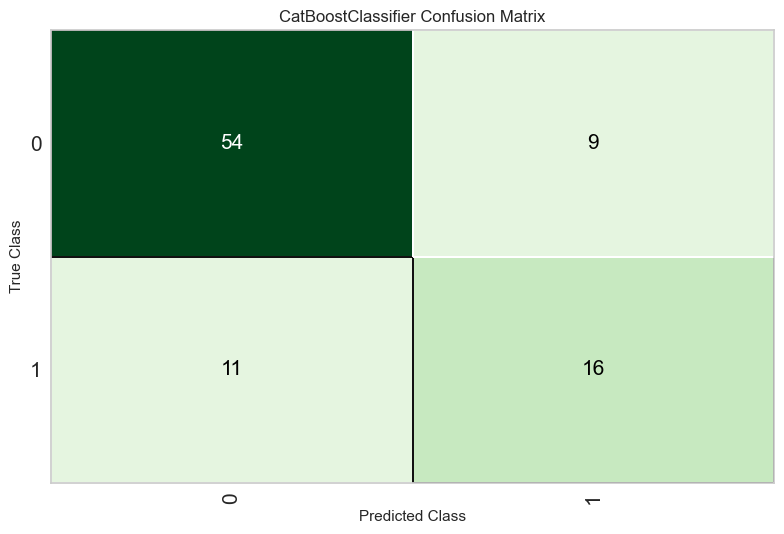

In [36]:
plot_model(cb, plot = 'confusion_matrix') #'auc' , 'error', 'pr'

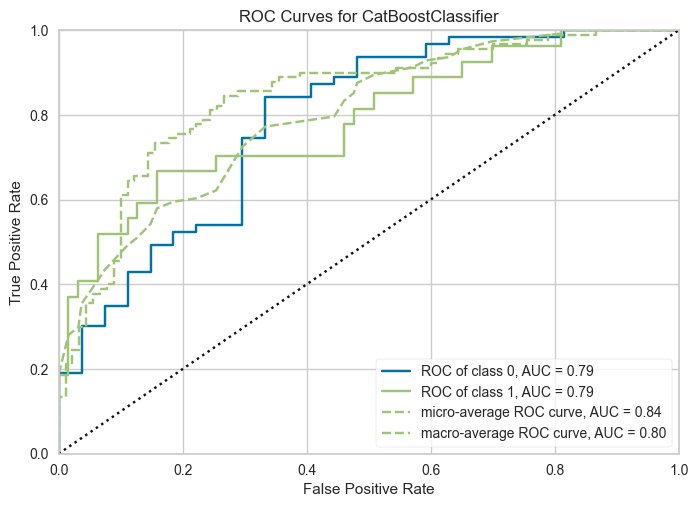

In [37]:
plot_model(cb, plot = 'auc') #'auc' , 'error', 'pr'

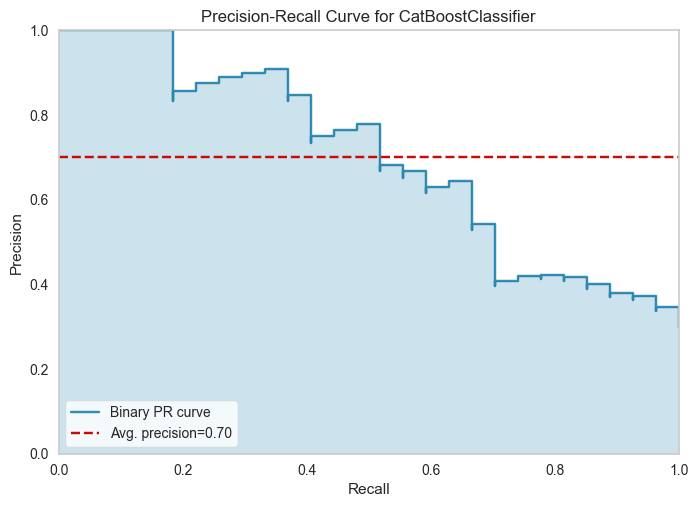

In [27]:
plot_model(cb, plot = 'pr') #'auc' , 'error', 'pr'

#### Plotting Model - lr

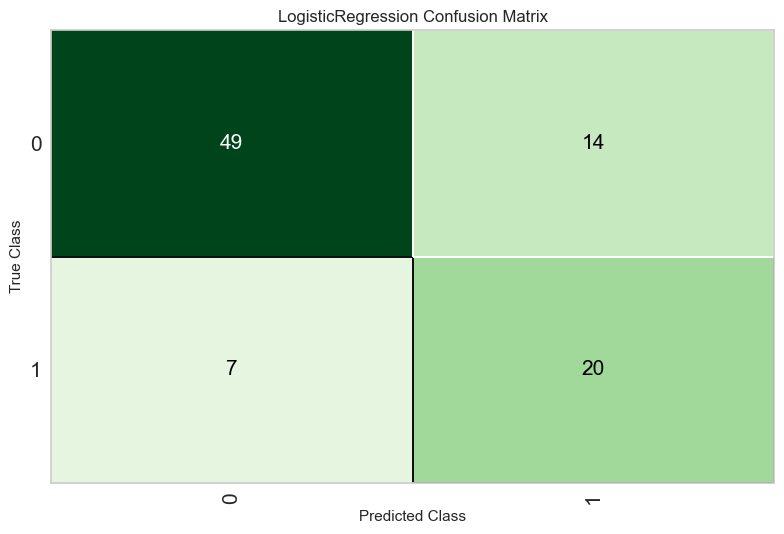

In [28]:
plot_model(tuned_lr, plot = 'confusion_matrix') #'auc' , 'error', 'pr'

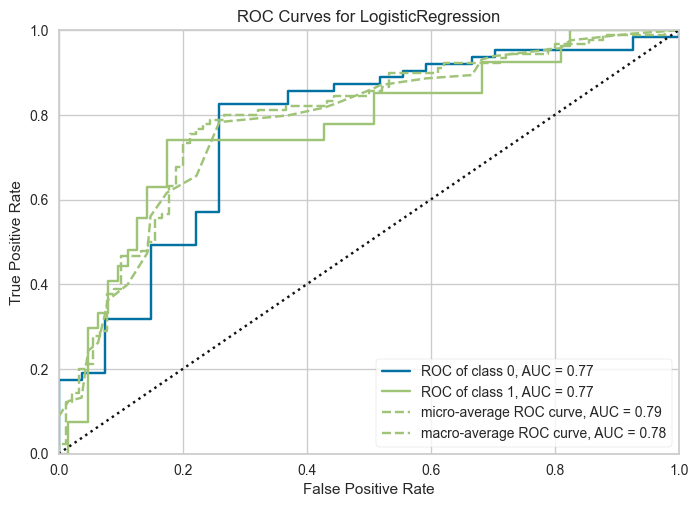

In [38]:
plot_model(tuned_lr, plot = 'auc') #'auc' , 'error', 'pr'

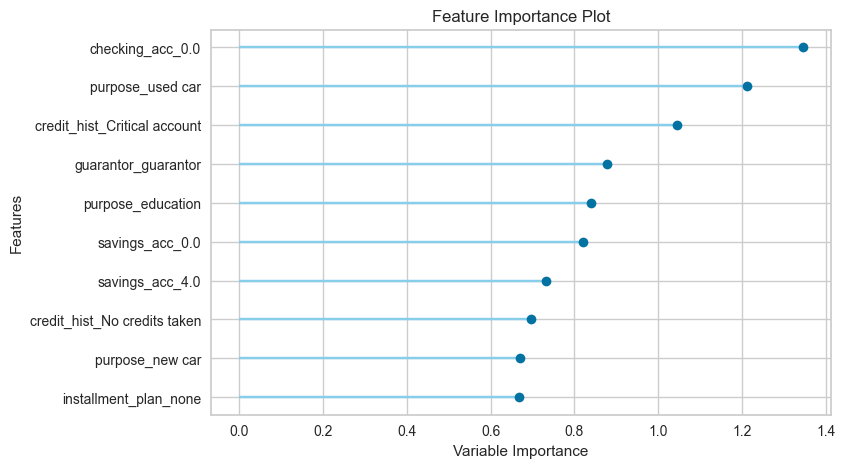

In [30]:
plot_model(tuned_lr, plot = 'feature') #'auc' , 'error', 'pr'

### Predicting on Test Data

In [39]:
# Predicting the test data - cb
predict_model(cb, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7778,0.7872,0,0,0,0.4595,0.4601


,checking_acc,duration_mnth,credit_hist,purpose,credit_amt,savings_acc,emp_status,installment_rate,pstatus_sex,guarantor,...,housing,existing_credit,job,dependents,telephone,foreign_worker,credit,prediction_label,prediction_score_bad,prediction_score_good
923,Btw 0 to 199 DM,12,Existing credits paid back duly,new car,2002,Less than 100 DM,Btw 4 to 7 years,3,male_single,none,...,rent,1,skilled employee,2,registered,yes,bad,bad,0.6801,0.3199
82,none,18,Existing credits paid back duly,business,1568,Btw 100 to 499 DM,Btw 1 to 4 years,3,female_divorced/separated/married,none,...,rent,1,unskilled - resident,1,none,yes,bad,bad,0.7189,0.2811
691,Btw 0 to 199 DM,15,Existing credits paid back duly,repairs,2631,Btw 100 to 499 DM,Btw 1 to 4 years,3,female_divorced/separated/married,none,...,own,1,unskilled - resident,1,none,yes,bad,good,0.4063,0.5937
653,Btw 0 to 199 DM,36,Delays in paying off,new car,8086,Btw 100 to 499 DM,Greater than 7 years,2,male_single,none,...,own,4,self-employed/management employee,1,registered,yes,good,bad,0.8256,0.1744
359,Less than 0 DM,30,Existing credits paid back duly,furniture/equipment,2406,Less than 100 DM,Btw 4 to 7 years,4,female_divorced/separated/married,none,...,rent,1,skilled employee,1,none,yes,good,good,0.1787,0.8213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Btw 0 to 199 DM,18,Delays in paying off,business,2427,none,Greater than 7 years,4,male_single,none,...,own,2,skilled employee,1,none,yes,bad,bad,0.8336,0.1664
401,Btw 0 to 199 DM,18,Critical account,business,1887,none,Btw 1 to 4 years,4,male_married/widowed,none,...,own,2,skilled employee,1,none,yes,bad,bad,0.6198,0.3802
507,Btw 0 to 199 DM,15,All credits taken paid back duly,new car,6850,Btw 100 to 499 DM,unemployed,1,male_single,none,...,own,1,self-employed/management employee,2,registered,yes,good,bad,0.5156,0.4844
235,Less than 0 DM,24,Existing credits paid back duly,radio/television,1823,Less than 100 DM,unemployed,4,male_single,none,...,own,1,self-employed/management employee,2,none,yes,good,good,0.3263,0.6737


In [42]:
# Predicting the test data - cb
predict_model(tuned_lr, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7667,0.7684,0,0,0,0.4828,0.4901


,checking_acc,duration_mnth,credit_hist,purpose,credit_amt,savings_acc,emp_status,installment_rate,pstatus_sex,guarantor,...,housing,existing_credit,job,dependents,telephone,foreign_worker,credit,prediction_label,prediction_score_bad,prediction_score_good
923,Btw 0 to 199 DM,12,Existing credits paid back duly,new car,2002,Less than 100 DM,Btw 4 to 7 years,3,male_single,none,...,rent,1,skilled employee,2,registered,yes,bad,bad,0.5231,0.4769
82,none,18,Existing credits paid back duly,business,1568,Btw 100 to 499 DM,Btw 1 to 4 years,3,female_divorced/separated/married,none,...,rent,1,unskilled - resident,1,none,yes,bad,bad,0.6786,0.3214
691,Btw 0 to 199 DM,15,Existing credits paid back duly,repairs,2631,Btw 100 to 499 DM,Btw 1 to 4 years,3,female_divorced/separated/married,none,...,own,1,unskilled - resident,1,none,yes,bad,good,0.2850,0.7150
653,Btw 0 to 199 DM,36,Delays in paying off,new car,8086,Btw 100 to 499 DM,Greater than 7 years,2,male_single,none,...,own,4,self-employed/management employee,1,registered,yes,good,good,0.2869,0.7131
359,Less than 0 DM,30,Existing credits paid back duly,furniture/equipment,2406,Less than 100 DM,Btw 4 to 7 years,4,female_divorced/separated/married,none,...,rent,1,skilled employee,1,none,yes,good,good,0.1591,0.8409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Btw 0 to 199 DM,18,Delays in paying off,business,2427,none,Greater than 7 years,4,male_single,none,...,own,2,skilled employee,1,none,yes,bad,bad,0.6370,0.3630
401,Btw 0 to 199 DM,18,Critical account,business,1887,none,Btw 1 to 4 years,4,male_married/widowed,none,...,own,2,skilled employee,1,none,yes,bad,bad,0.5985,0.4015
507,Btw 0 to 199 DM,15,All credits taken paid back duly,new car,6850,Btw 100 to 499 DM,unemployed,1,male_single,none,...,own,1,self-employed/management employee,2,registered,yes,good,good,0.4448,0.5552
235,Less than 0 DM,24,Existing credits paid back duly,radio/television,1823,Less than 100 DM,unemployed,4,male_single,none,...,own,1,self-employed/management employee,2,none,yes,good,good,0.2384,0.7616


In [43]:
# TO predict the whole data - lgbm
predict_model(tuned_lr, data = data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7522,0.8261,0,0,0,0.4624,0.4750


,checking_acc,duration_mnth,credit_hist,purpose,credit_amt,savings_acc,emp_status,installment_rate,pstatus_sex,guarantor,...,installment_plan,housing,existing_credit,job,dependents,telephone,foreign_worker,credit,prediction_label,prediction_score
0,Less than 0 DM,6,Critical account,radio/television,1169,none,Greater than 7 years,4,male_single,none,...,none,own,2,skilled employee,1,registered,yes,bad,bad,0.9718
1,Btw 0 to 199 DM,48,Existing credits paid back duly,radio/television,5951,Less than 100 DM,Btw 1 to 4 years,2,female_divorced/separated/married,none,...,none,own,1,skilled employee,1,none,yes,good,good,0.8177
3,Less than 0 DM,42,Existing credits paid back duly,furniture/equipment,7882,Less than 100 DM,Btw 4 to 7 years,2,male_single,guarantor,...,none,free,1,skilled employee,2,none,yes,bad,bad,0.5578
4,Less than 0 DM,24,Delays in paying off,new car,4870,Less than 100 DM,Btw 1 to 4 years,3,male_single,none,...,none,free,2,skilled employee,2,none,yes,good,good,0.9029
6,none,24,Existing credits paid back duly,furniture/equipment,2835,Btw 500 to 999 DM,Greater than 7 years,3,male_single,none,...,none,own,1,skilled employee,1,none,yes,bad,bad,0.8738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,none,12,Existing credits paid back duly,furniture/equipment,1736,Less than 100 DM,Btw 4 to 7 years,3,female_divorced/separated/married,none,...,none,own,1,unskilled - resident,1,none,yes,bad,bad,0.8826
996,Less than 0 DM,30,Existing credits paid back duly,used car,3857,Less than 100 DM,Btw 1 to 4 years,4,male_divorced/separated,none,...,none,own,1,self-employed/management employee,1,registered,yes,bad,good,0.5390
997,none,12,Existing credits paid back duly,radio/television,804,Less than 100 DM,Greater than 7 years,4,male_single,none,...,none,own,1,skilled employee,1,none,yes,bad,bad,0.9137
998,Less than 0 DM,45,Existing credits paid back duly,radio/television,1845,Less than 100 DM,Btw 1 to 4 years,4,male_single,none,...,none,free,1,skilled employee,1,registered,yes,good,good,0.7919


In [44]:
# TO predict the whole data - lgbm
predict_model(cb, data = data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9622,0.9825,0,0,0,0.9083,0.9089


,checking_acc,duration_mnth,credit_hist,purpose,credit_amt,savings_acc,emp_status,installment_rate,pstatus_sex,guarantor,...,installment_plan,housing,existing_credit,job,dependents,telephone,foreign_worker,credit,prediction_label,prediction_score
0,Less than 0 DM,6,Critical account,radio/television,1169,none,Greater than 7 years,4,male_single,none,...,none,own,2,skilled employee,1,registered,yes,bad,bad,0.9706
1,Btw 0 to 199 DM,48,Existing credits paid back duly,radio/television,5951,Less than 100 DM,Btw 1 to 4 years,2,female_divorced/separated/married,none,...,none,own,1,skilled employee,1,none,yes,good,good,0.8540
3,Less than 0 DM,42,Existing credits paid back duly,furniture/equipment,7882,Less than 100 DM,Btw 4 to 7 years,2,male_single,guarantor,...,none,free,1,skilled employee,2,none,yes,bad,bad,0.8097
4,Less than 0 DM,24,Delays in paying off,new car,4870,Less than 100 DM,Btw 1 to 4 years,3,male_single,none,...,none,free,2,skilled employee,2,none,yes,good,good,0.8963
6,none,24,Existing credits paid back duly,furniture/equipment,2835,Btw 500 to 999 DM,Greater than 7 years,3,male_single,none,...,none,own,1,skilled employee,1,none,yes,bad,bad,0.9625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,none,12,Existing credits paid back duly,furniture/equipment,1736,Less than 100 DM,Btw 4 to 7 years,3,female_divorced/separated/married,none,...,none,own,1,unskilled - resident,1,none,yes,bad,bad,0.9464
996,Less than 0 DM,30,Existing credits paid back duly,used car,3857,Less than 100 DM,Btw 1 to 4 years,4,male_divorced/separated,none,...,none,own,1,self-employed/management employee,1,registered,yes,bad,bad,0.8460
997,none,12,Existing credits paid back duly,radio/television,804,Less than 100 DM,Greater than 7 years,4,male_single,none,...,none,own,1,skilled employee,1,none,yes,bad,bad,0.9240
998,Less than 0 DM,45,Existing credits paid back duly,radio/television,1845,Less than 100 DM,Btw 1 to 4 years,4,male_single,none,...,none,free,1,skilled employee,1,registered,yes,good,good,0.9035


### Testing Model on the Unseen data
- The real test of a model depends on how well it perform on an unseen data. Not only measured, accuracy but the Precison, Recall and F1_score as they are highly important for the business model

#### Predicting on Unseen data - lr

In [45]:
# To predict the unseen data
cb_pred = predict_model(cb, data = unseen)

# Uncomment and RUn to view where it got the credit wrong
# pred[pred['credit'] != pred['prediction_label']]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8500,0.8589,0,0,0,0.6341,0.6436


In [46]:
## Creating a confusion Matrix
y_true = cb_pred['credit']
y_pred = cb_pred['prediction_label']
cb_pred =confusion_matrix(y_true, y_pred)
cb_pred

array([[64,  4],
       [11, 21]], dtype=int64)

In [48]:
cb_cm_df = pd.DataFrame(cb_pred, index = ['bad', 'good'], columns = ['bad', 'good'])
cb_cm_df

,bad,good
bad,64,4
good,11,21


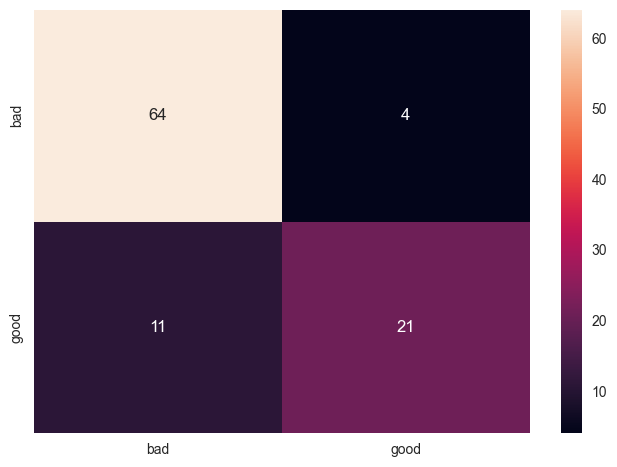

In [49]:
sns.heatmap(data = cb_cm_df, annot=True, fmt = '00');

In [53]:
# Calculate accuracy
accuracy = (cb_cm_df['good']['good'] + cb_cm_df['bad']['bad']) / sum(sum(i) for i in cb_cm_df.values)
print(f'Cat Boost model Accuracy: {accuracy * 100:.1f}%')

# Calculate precision
precision = cb_cm_df['good']['good'] / (cb_cm_df['good']['good'] + cb_cm_df['bad']['good'])
print(f'Cat Boost model Precision: {precision * 100:.1f}%')

# Calculate recall
recall = cb_cm_df['good']['good'] / (cb_cm_df['good']['good'] + cb_cm_df['good']['bad'])
print(f'Cat Boost model Recall: {recall * 100:.1f}%')

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'Cat Boost model F1 Score: {f1_score * 100:.1f}%')

Cat Boost model Accuracy: 85.0%
Cat Boost model Precision: 65.6%
Cat Boost model Recall: 84.0%
Cat Boost model F1 Score: 73.7%


#### Predicting on Unseen data - lr

In [54]:
# To predict the unseen data
lr_pred = predict_model(lr, data = unseen)

# Uncomment and RUn to view where it got the credit wrong
# pred[pred['credit'] != pred['prediction_label']]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7000,0.8107,0,0,0,0.3912,0.4136


In [55]:
## Creating a confusion Matrix
y_true = lr_pred['credit']
y_pred = lr_pred['prediction_label']
lr_pred =confusion_matrix(y_true, y_pred)
lr_pred

array([[45, 23],
       [ 7, 25]], dtype=int64)

In [56]:
lr_cm_df = pd.DataFrame(lr_pred, index = ['bad', 'good'], columns = ['bad', 'good'])
lr_cm_df

,bad,good
bad,45,23
good,7,25


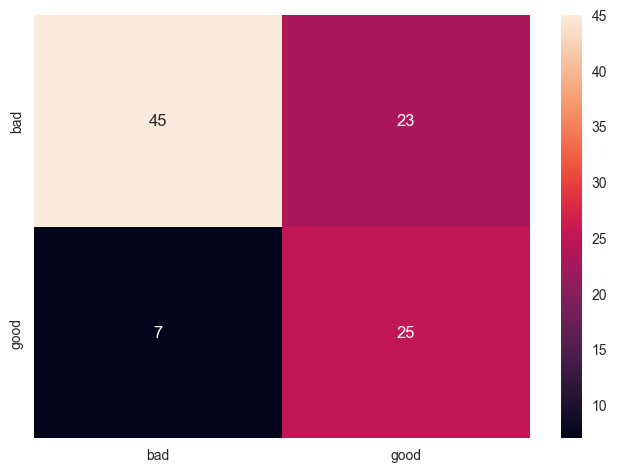

In [57]:
sns.heatmap(data = lr_cm_df, annot=True, fmt = '00');

In [58]:
# Calculate accuracy
accuracy = (lr_cm_df['good']['good'] + lr_cm_df['bad']['bad']) / sum(sum(i) for i in lr_cm_df.values)
print(f'LoR model Accuracy: {accuracy * 100:.1f}%')

# Calculate precision
precision = lr_cm_df['good']['good'] / (lr_cm_df['good']['good'] + lr_cm_df['bad']['good'])
print(f'LoR model Precision: {precision * 100:.1f}%')

# Calculate recall
recall = lr_cm_df['good']['good'] / (lr_cm_df['good']['good'] + lr_cm_df['good']['bad'])
print(f'LoR model Recall: {recall * 100:.1f}%')

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f'LoR model F1 Score: {f1_score * 100:.1f}%')


LoR model Accuracy: 70.0%
LoR model Precision: 78.1%
LoR model Recall: 52.1%
LoR model F1 Score: 62.5%


In [64]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2930, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Finalizing and saving Model

In [59]:
# Finalize Model
model = finalize_model(cb)
model

Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['duration_mnth', 'credit_amt',
                                             'installment_rate',
                                             'Residence_LOS', 'age',
                                             'existing_credit', 'dependents'],
                                    t...
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('balance',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=None,
                                                                              sampling_strategy='auto')))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x00000213128DBF70>)],
         verbose=False)

In [66]:
save_model(cb, './model/py_german_credit')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['duration_mnth', 'credit_amt',
                                              'installment_rate',
                                              'Residence_LOS', 'age',
                                              'existing_credit', 'dependents'],
                                     t...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               return_df=True,
                                                  